# Regressão Linear - Modelo & Dados Sintéticos

Iremos implementar o método da Regressão Linear passando pelos seguintes passos:
 
1) O Modelo:
   - Parâmetros iniciais (vetor de peso e bias);
   - Função **Forward**;
   - Função de **Perda**;
2) O Treino:
   - Função **Step**;
   - Função **Zero_Grad**;
   - Função de **Treino**;
3) Os Dados:
   - Geração dos Dados;
   - Plotagem dos Dados;

In [296]:
import torch
import numpy as numpy
import matplotlib.pyplot as plt

Para efeito de aprendizado, vamos gerar dados sintéticos para executar o treinamento e poder analisar melhor os resultados. 

# 💾 Os Dados:


#### 📚 Exemplo Dados 2D:

Podemos criar os dados com quantas dimensões quisermos, mas para podermos visualizar na plotagem, vamos começar com dados bidimensionais. Os dados criados a seguir terão esse formato:

$$
\begin{pmatrix*}[r] 
x_{1} & y_{1} \\
\vdots & \vdots \\
x_{n} & y_{n} \\
\end{pmatrix*} 
$$

Onde $x_i$ representa o atributo do item $i$ e $y_i$ representa o rótulo do item i. Já *n* representa o número de itens que temos nos dados. Veja o exemplo abaixo:

In [297]:
dados = torch.normal(0, 1, (10, 2))
print(dados)

tensor([[ 1.3112,  0.0964],
        [-0.7132, -0.7986],
        [-0.5200,  0.4661],
        [ 0.2052, -0.0486],
        [ 0.2835, -0.0436],
        [-0.4706,  0.8026],
        [-0.3240, -1.4292],
        [ 0.1176, -1.8178],
        [-0.6758, -0.4930],
        [-1.2138,  0.5900]])


### 🔵 Classe 'Data' e seus métodos:

Queremos uma função genérica de criação de dados que crie os dados a partir do vetor de pesos, com alguma variação, para podermos analisar de maneira mais clara os resultados.

A ideia é gerar os valores para os atributos (dados_x) e os rótulos (dados_y) a partir do vetor de pesos, porém com alguma variação determinada pelo *noise* colocado de forma aleatorizada nos valores dos rótulos. Veja abaixo como isso pode ser feito em termos de código:

In [298]:
w_exemplo = torch.tensor([5.0])
b_exeemplo = torch.tensor([3.0])
dados_x = torch.randn(10, 1)
noise = torch.randn(10, 1) * 0.1
dados_y = torch.matmul(dados_x, w_exemplo) + b_exeemplo + noise

Para facilitar a implementação, vamos usar uma classe com alguns métodos para a criação dos dados de forma mais imediata:

In [299]:
class Data():
    def __init__(self, w, b, n, noise=0.1):
        self.x = torch.randn(n, len(w))
        self.y = torch.matmul(self.x, w.reshape((-1, 1))) + b + torch.randn(n, 1) * noise

Abaixo é possível ver as formas que os dados recebem a partir do formato do tensor W. 

In [300]:
w = torch.tensor([5.0])
b = torch.tensor([3.0])
X = Data(w, b, 1000)

# print(X.x.shape)
# print(X.y.shape)
# print(X.x)
# print(X.y)

### 📊 Plotagem Simples dos Dados 2D:

In [301]:
def plot_dados_2d(dados):
    plt.plot(dados.x.detach().numpy(), dados.y.detach().numpy(), '*')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

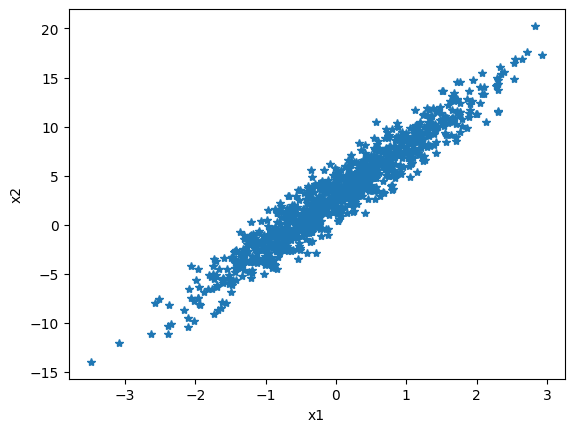

In [302]:
W = torch.tensor([5.0])
B = torch.tensor([3.0])
N_itens = 1000
Noise_rate = 1.5
D = Data(W, B, N_itens, Noise_rate)
plot_dados_2d(D)

## O Modelo:

### 🏁 Parâmetros Iniciais:

Como parâmetros iniciais temos o vetor de pesos (W), o bias (B), o *learning rate* (LR) e o número de épocas (N_epocas):

In [303]:
W = torch.tensor([5.0])
B = torch.tensor([3.0])
LR = 0.1
N_epocas = 100

### Funções importantes:


Primeiro temos a **Forward**:

In [304]:
def forward(x, W, B):
    return torch.matmul(x, W.reshape((-1, 1))) + B

E a **Função de Perda** (Erro quadrático):

In [305]:
def loss_function(y, y_pred):
    return torch.mean(1/2 * (y - y_pred) ** 2)

## O Treino:

Função **Step** para atualização dos parâmetros mais importantes do modelo:

In [306]:
def step(W, B, X, Y, lr):
    Y_pred = forward(X, W, B)
    loss = loss_function(Y, Y_pred)
    loss.backward(retain_graph=True)
    W.data -= lr * W.grad.data
    B.data -= lr * B.grad.data
    W.grad.zero_()
    B.grad.zero_()
    return W, B, loss

Função de **Treino**:

In [307]:
def train(W, B, X, Y, lr, n_epochs):
    loss_list = []
    for _ in range(n_epochs):
        W, B, loss = step(W, B, X, Y, lr)
        loss_list.append(loss.data)
    return W, B, loss_list

#### Funções de Plotagem:

In [308]:
def plot_loss(loss_list):
    plt.plot(loss_list)
    plt.xlabel('Época')
    plt.ylabel('Loss')
    plt.show()

In [309]:
def plot_dados_result(dados, W, B):
    aux = torch.arange(-4, 4, 0.1).reshape(-1, 1)
    func = W.data * aux + B.data
    plt.plot(dados.x.detach().numpy(), dados.y.detach().numpy(), '*')
    plt.plot(aux.numpy(), func.numpy(), 'r')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

#### Treinamento Final:

torch.Size([1])


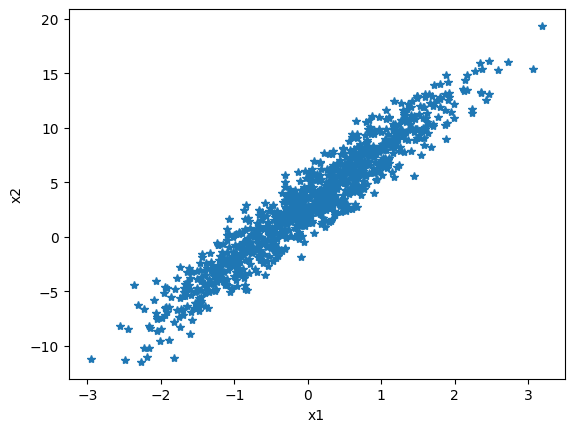

In [310]:
W = torch.tensor([5.0], requires_grad=True)
print(W.shape)
B = torch.tensor([3.0], requires_grad=True)
Noise = 1.5
N_itens = 1000
LR = 0.1
D = Data(W, B, N_itens, Noise)
plot_dados_2d(D)

W INICIAL:  tensor([0.7129])
B INICIAL:  tensor([0.4721])
W FINAL:  tensor([4.9818])
B FINAL:  tensor([2.9720])


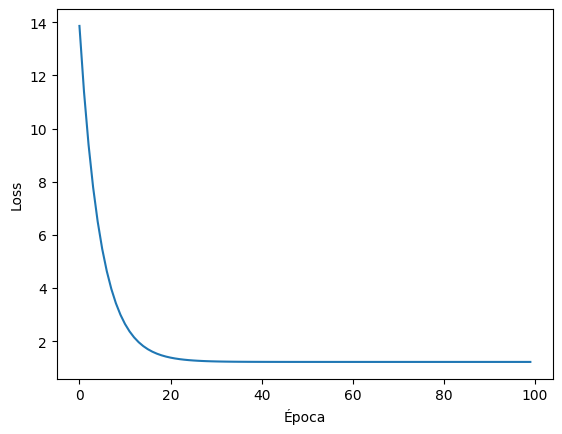

100


In [311]:
WT = torch.randn(1, requires_grad=True)
print("W INICIAL: ", WT.data)
BT = torch.randn(1, requires_grad=True)
print("B INICIAL: ", BT.data)

W_new, B_new, loss_list = train(WT, BT, D.x, D.y, LR, N_epocas)
print("W FINAL: ", W_new.data)
print("B FINAL: ", B_new.data)
plot_loss(loss_list)
print(len(loss_list))

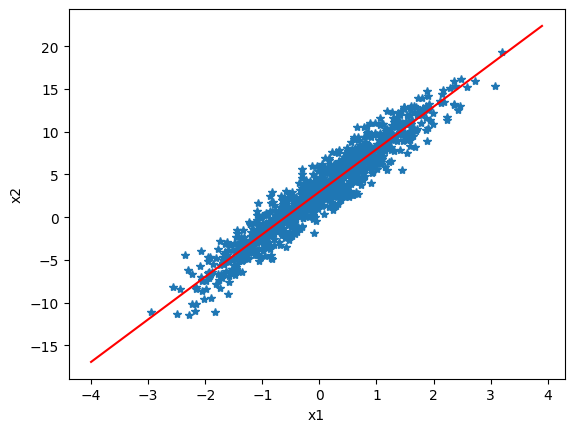

In [312]:
plot_dados_result(D, W_new, B_new)